In [1]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import zscore, skew 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_csv('bank.csv')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
bank_df=pd.DataFrame(data)

In [9]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [13]:
print(data.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [15]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [17]:
num_imputer = SimpleImputer(strategy='mean')
data[data.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))

In [19]:
# Impute missing categorical values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [21]:
print("Missing values after handling:\n", data.isnull().sum())
print("Missing values have been successfully handled.")

Missing values after handling:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
Missing values have been successfully handled.


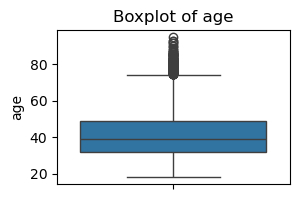

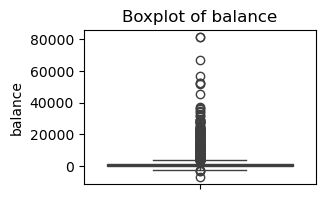

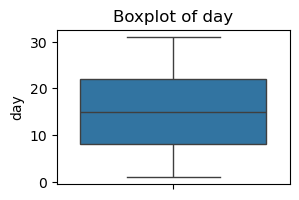

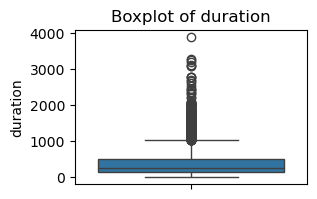

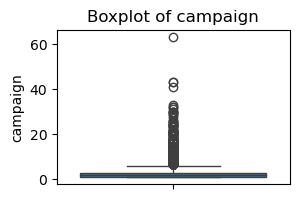

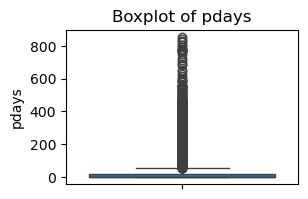

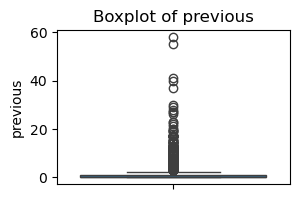

In [23]:
#Check for and Remove Outliers
# Box plot to visualize outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [25]:
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

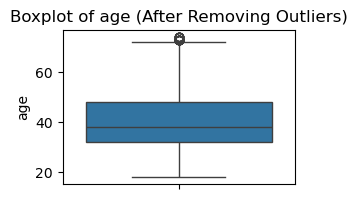

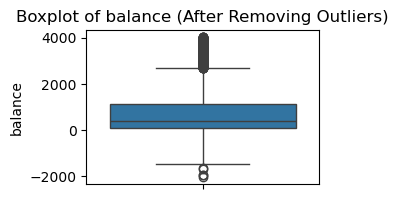

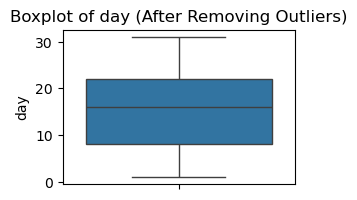

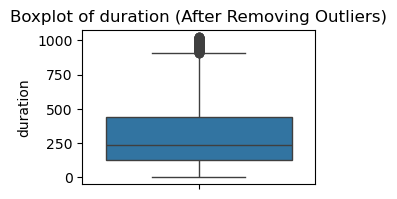

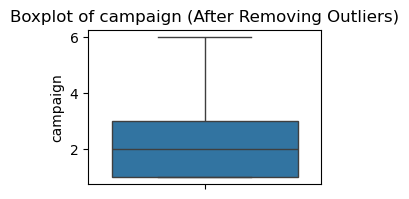

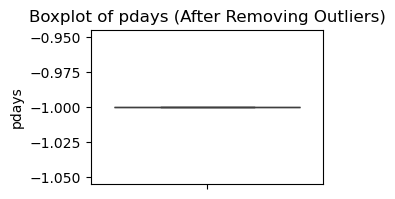

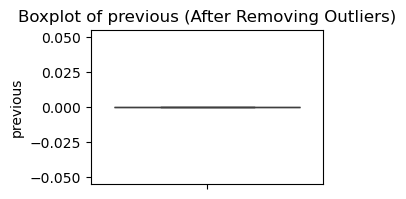

In [27]:
#Boxplot After Removing Outliers
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col} (After Removing Outliers)")
    plt.show()

In [29]:
# Address Skewed Data
# Check skewness
skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)


Skewness before transformation:
 age         0.579329
balance     1.377286
day         0.110019
duration    1.060811
campaign    1.268016
pdays            NaN
previous         NaN
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12604\656373938.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))


In [31]:
# Apply PowerTransformer to normalize skewed data
pt = PowerTransformer(method='yeo-johnson')
data[numerical_cols] = pt.fit_transform(data[numerical_cols])

In [33]:
# Validate transformations
skewness_after = data[numerical_cols].apply(lambda x: skew(x))
print("Skewness after transformation:\n", skewness_after)

Skewness after transformation:
 age         0.007855
balance     0.377692
day        -0.157362
duration   -0.029047
campaign    0.202926
pdays            NaN
previous         NaN
dtype: float64


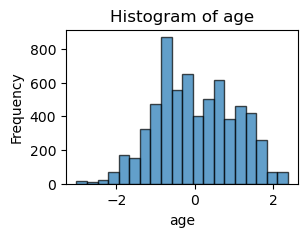

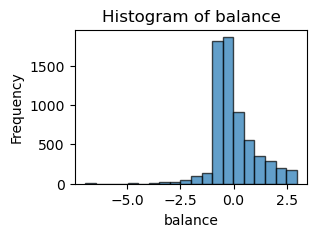

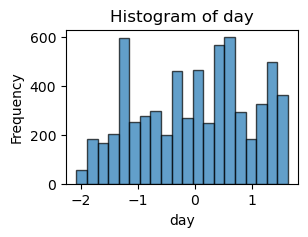

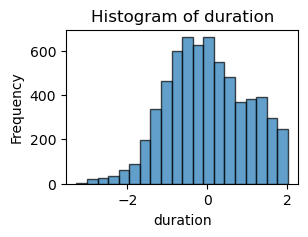

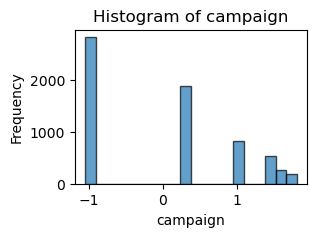

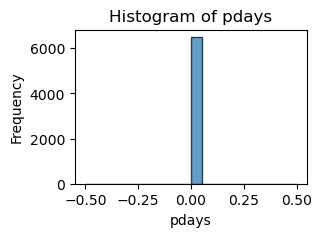

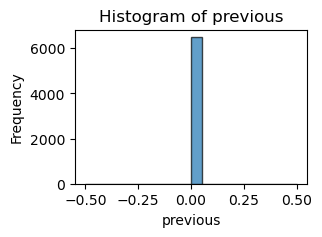

In [35]:
# 1.Histogram: Data distribution for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

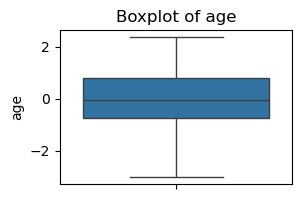

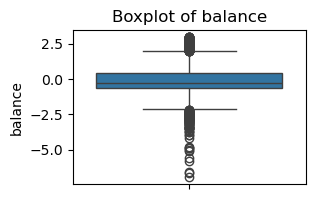

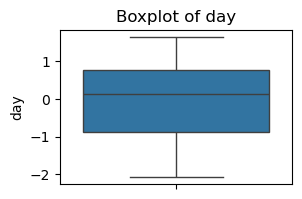

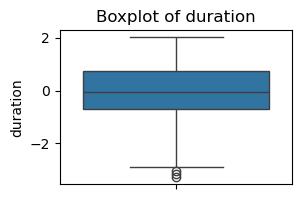

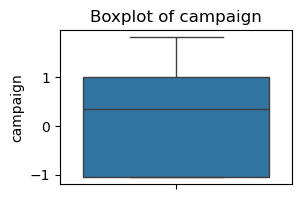

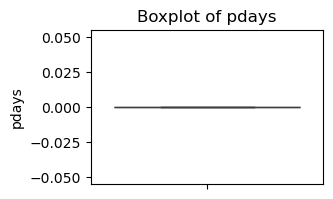

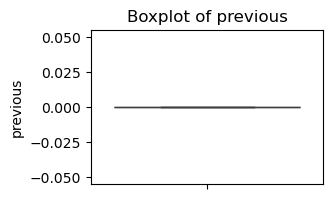

In [37]:
# 2.Boxplot: Identifying outliers
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

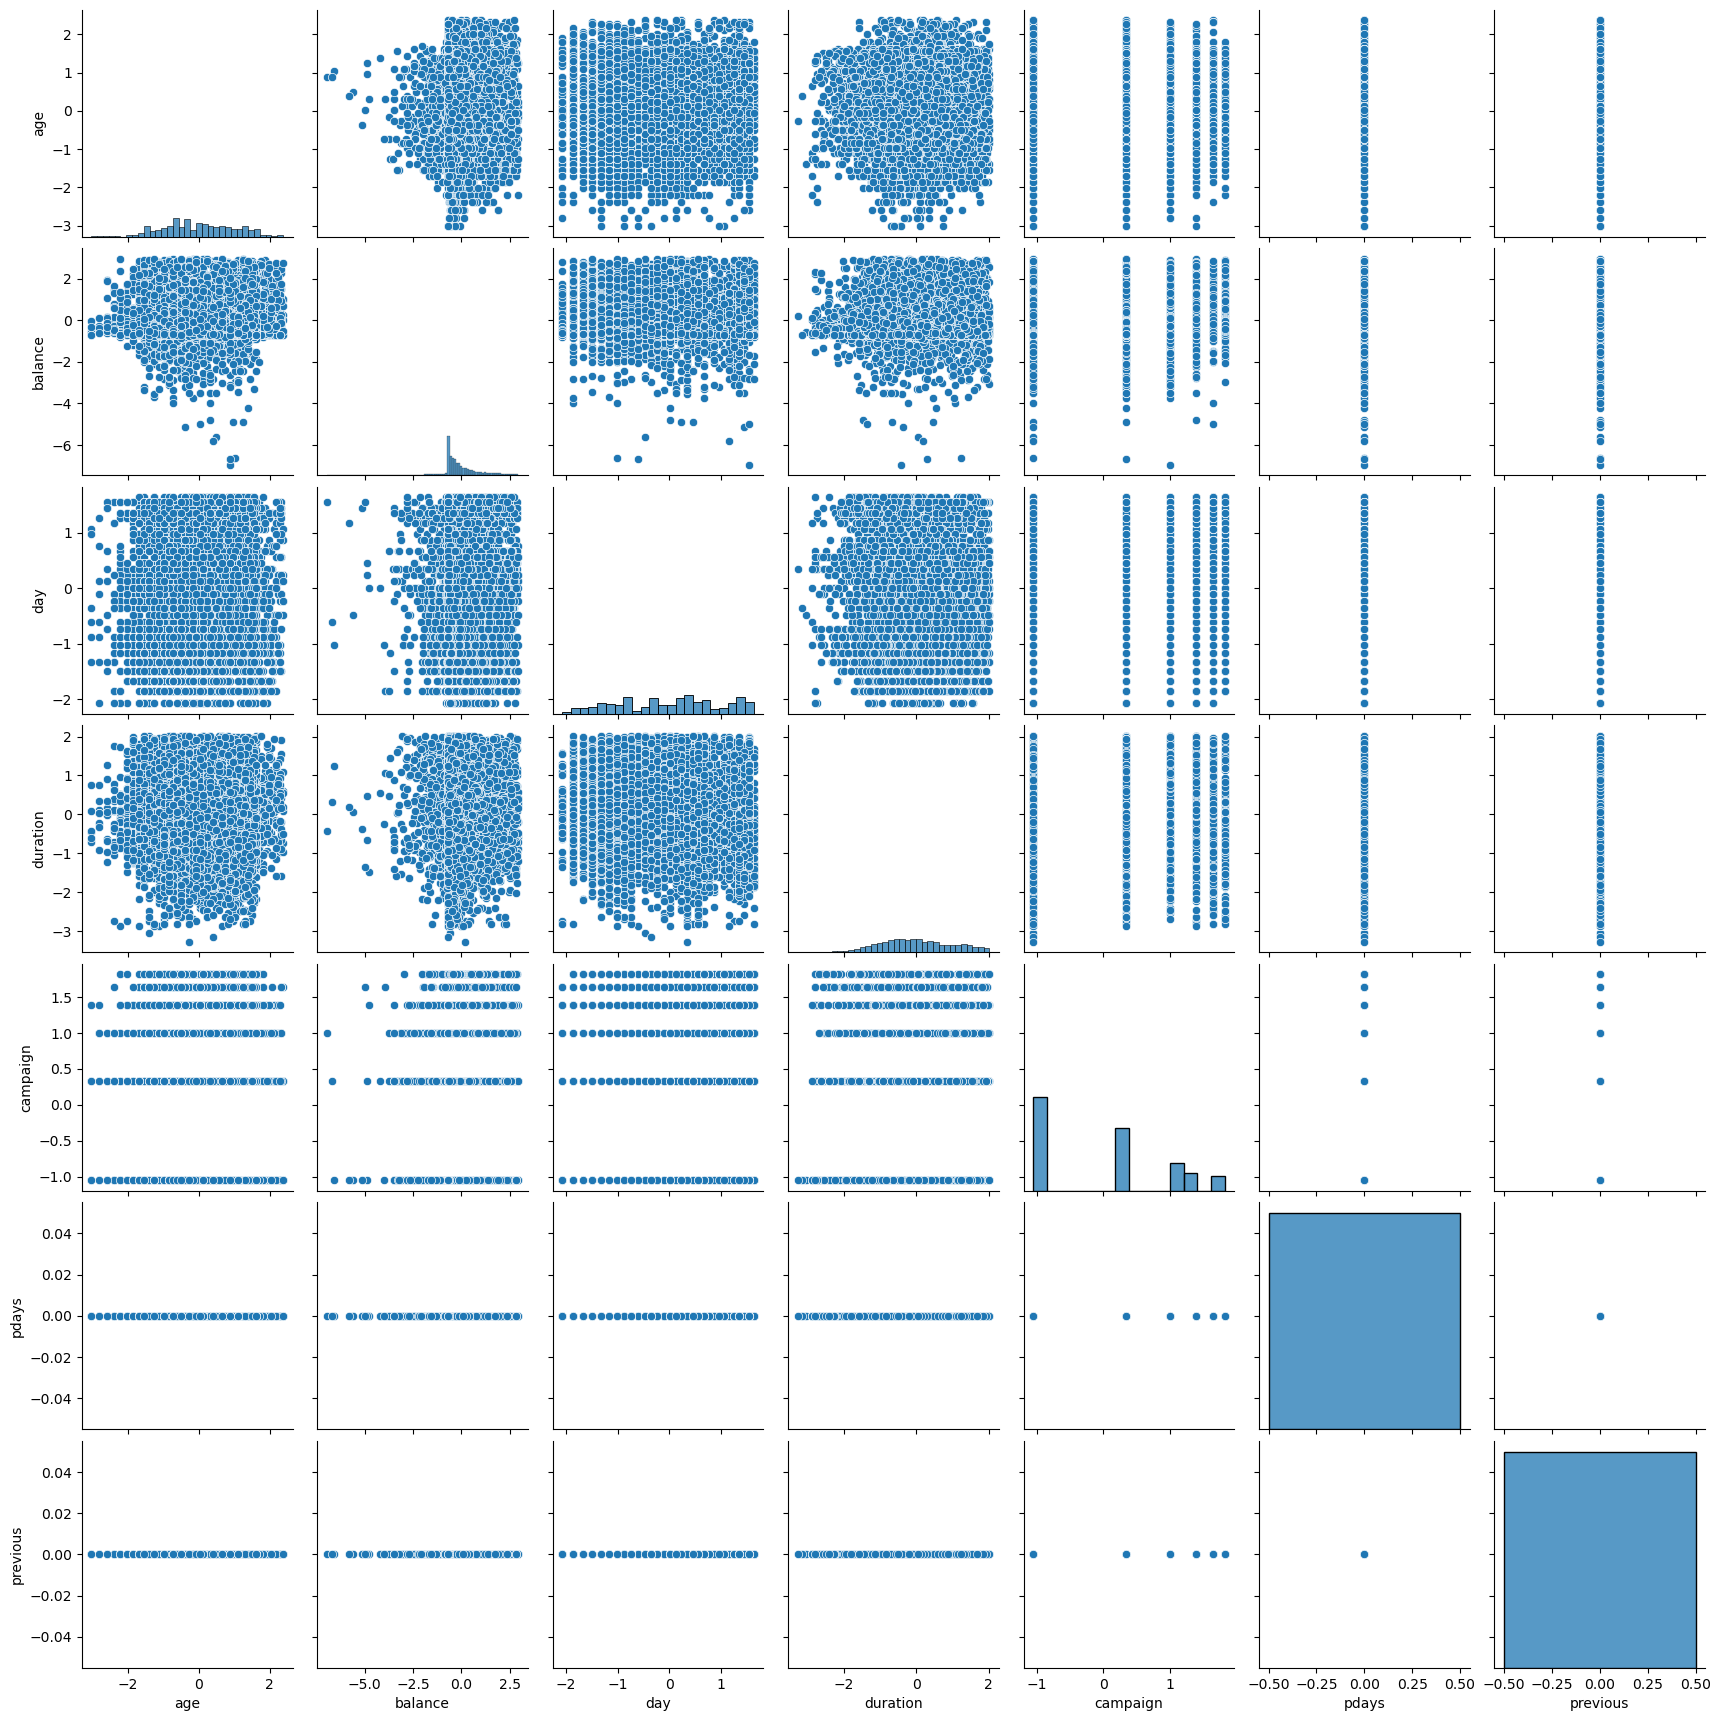

In [40]:
# 3.Pair Plot: Relationships between numerical features
sns.pairplot(data)
plt.show()


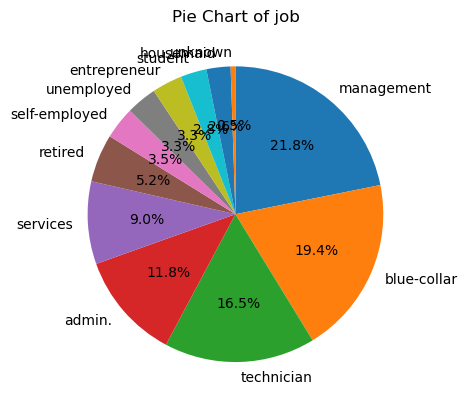

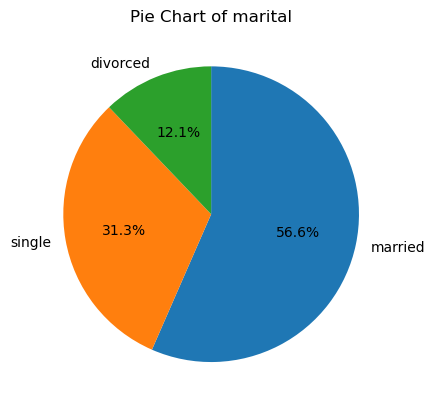

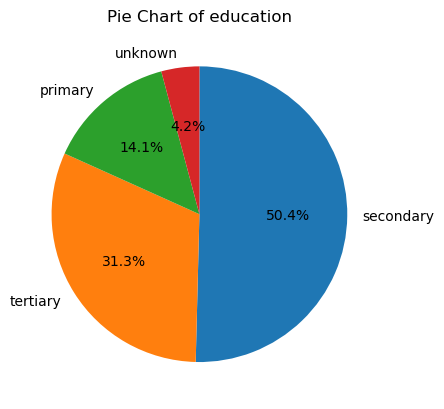

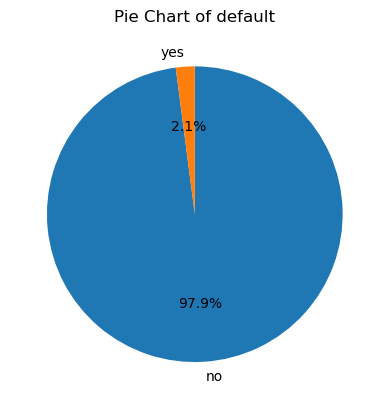

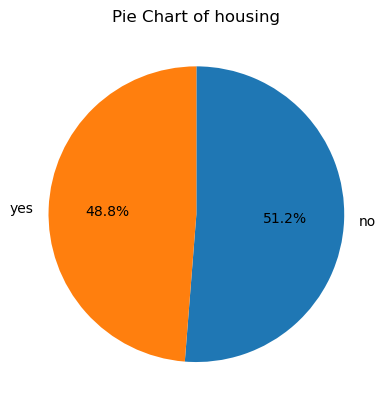

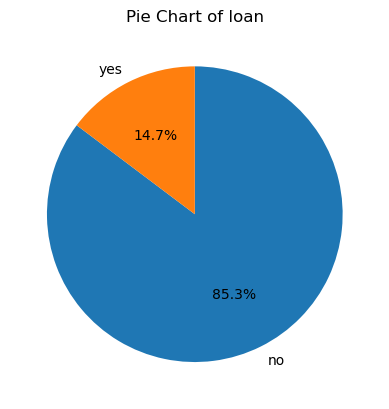

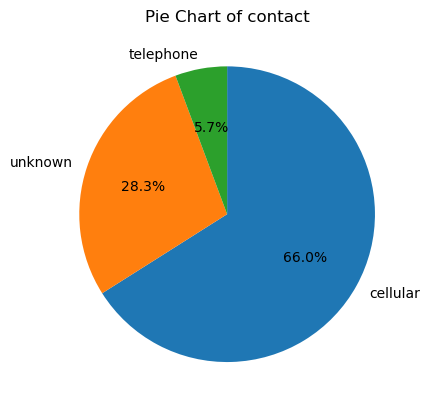

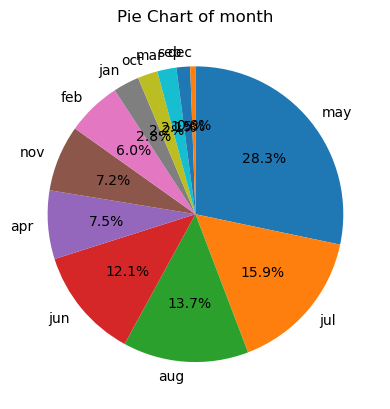

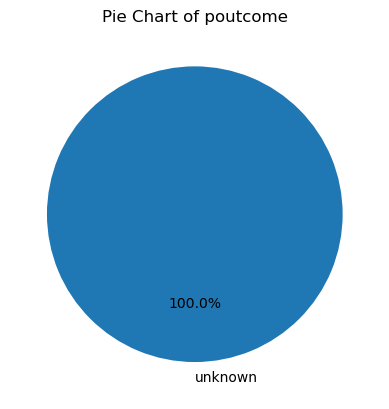

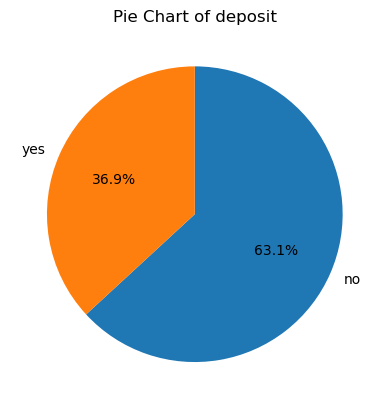

In [42]:
# 4 Pie Diagram: Proportions in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

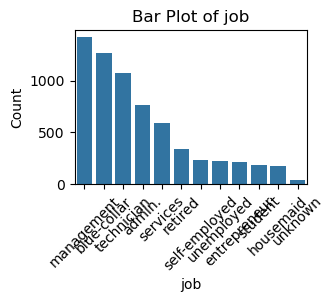

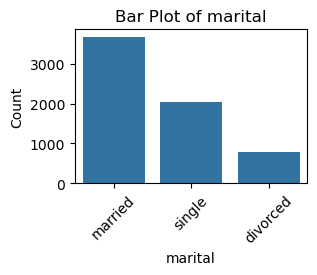

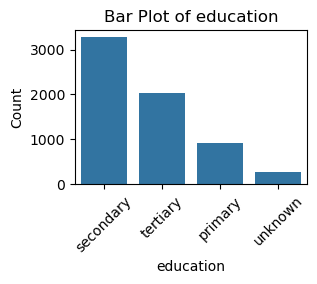

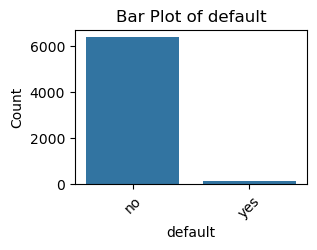

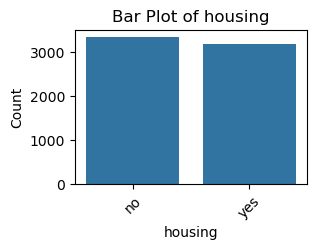

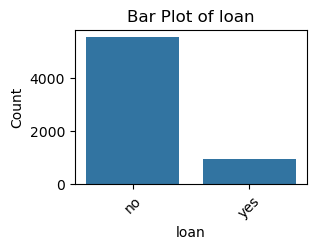

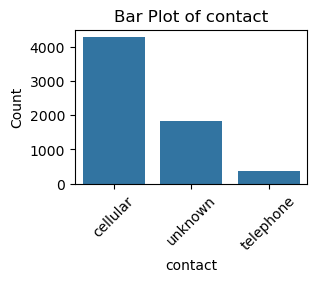

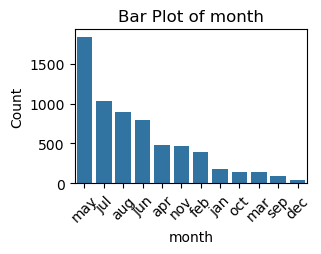

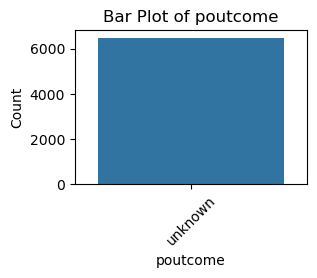

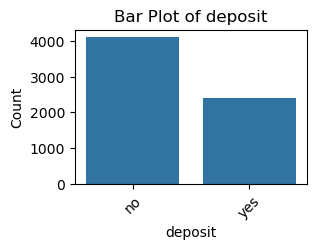

In [44]:
# 5Bar Plot: Categorical data counts
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

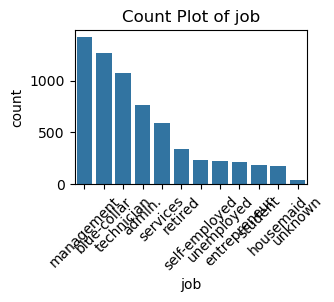

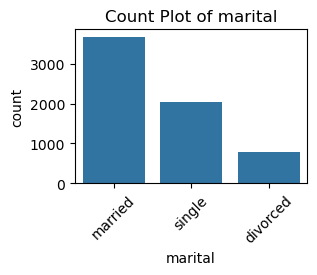

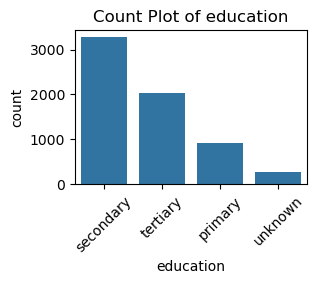

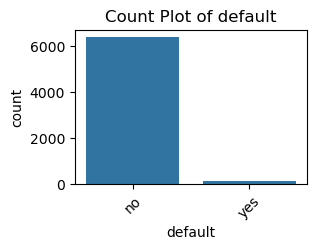

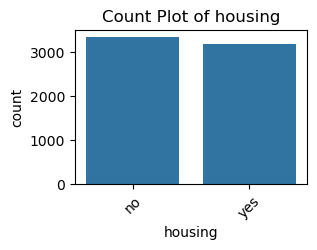

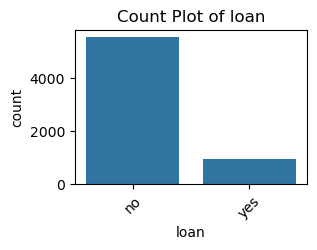

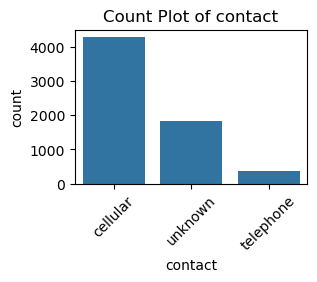

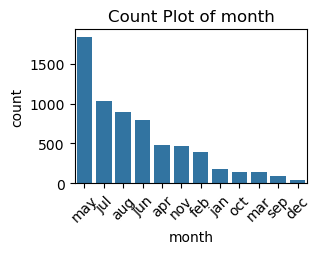

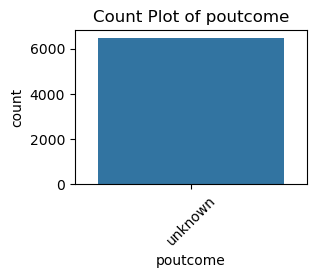

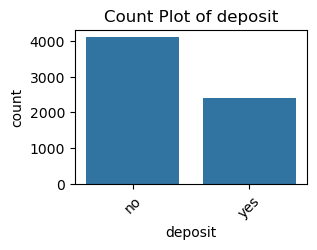

In [46]:
# 6 Count Plot: Count visualization for categorical features
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

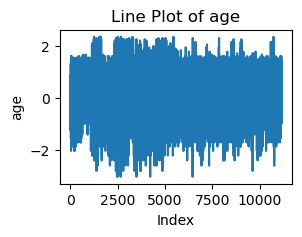

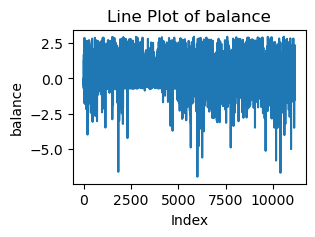

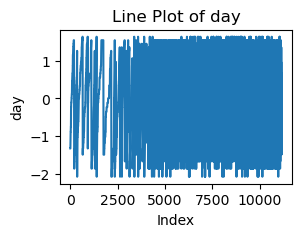

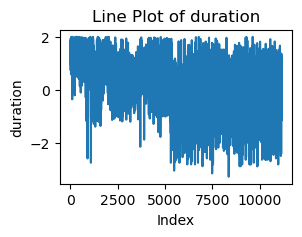

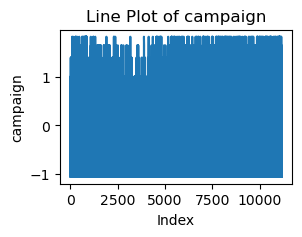

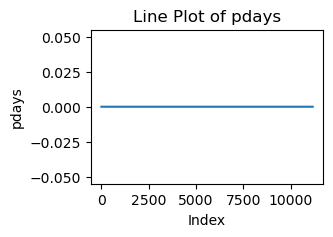

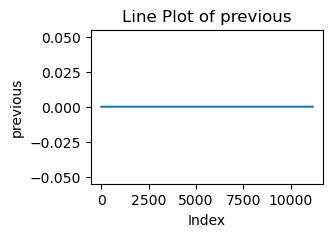

In [48]:
# 7 Line Plot: Trend visualization for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    plt.plot(data.index, data[col])
    plt.title(f"Line Plot of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

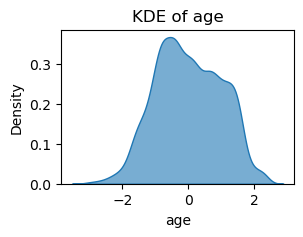

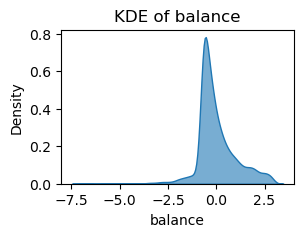

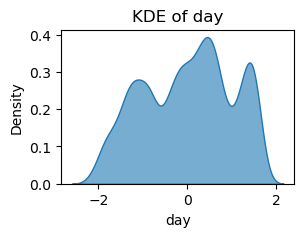

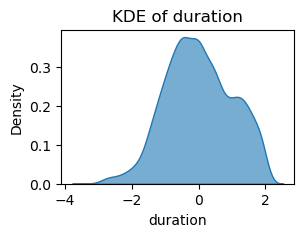

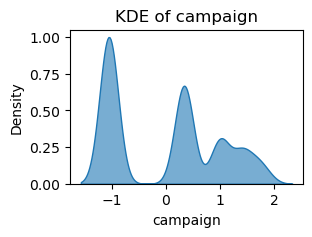

C:\Users\user\AppData\Local\Temp\ipykernel_12604\2373538390.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], fill=True, alpha=0.6)


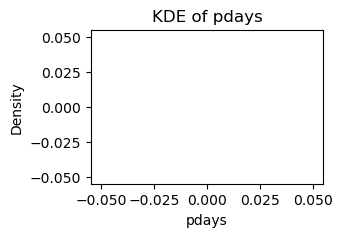

C:\Users\user\AppData\Local\Temp\ipykernel_12604\2373538390.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], fill=True, alpha=0.6)


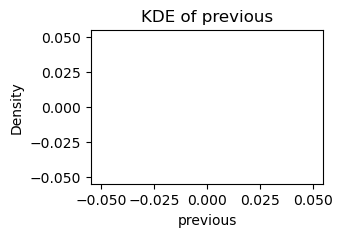

In [50]:
# 8 Kernel Density Estimation (KDE): Data density
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.kdeplot(data[col], fill=True, alpha=0.6)
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [52]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the transformed dataset
print("\nData After One-Hot Encoding:")
print(data_encoded.head())


Data After One-Hot Encoding:
         age   balance       day  duration  campaign  pdays  previous  \
3   1.306837  1.645316 -1.325538  1.129735 -1.051486    0.0       0.0   
4   1.239980 -0.482195 -1.325538  1.353632  0.338336    0.0       0.0   
5   0.309698 -0.700032 -1.325538  1.086326  0.338336    0.0       0.0   
8  -0.169692 -0.698381 -1.169408  1.201593 -1.051486    0.0       0.0   
10 -0.068269 -0.575468 -1.020553  1.593170 -1.051486    0.0       0.0   

    job_blue-collar  job_entrepreneur  job_housemaid  ...  month_feb  \
3             False             False          False  ...      False   
4             False             False          False  ...      False   
5             False             False          False  ...      False   
8             False             False          False  ...      False   
10            False             False          False  ...      False   

    month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
3       False      False  

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Define the target column
target_column = 'deposit'

# Encode the target variable as binary (0 for 'no', 1 for 'yes')
data[target_column] = data[target_column].map({'no': 0, 'yes': 1})

# Split data into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Identify categorical columns for encoding
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

# Select top-k features based on importance
k = 5  # Number of features to select
selected_features = feature_importances.nlargest(k).index
X_selected = X_encoded[selected_features]

# Scaling the selected features
# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
X_standardized = standard_scaler.fit_transform(X_selected)

# Apply Min-Max Scaling
X_normalized = minmax_scaler.fit_transform(X_selected)

# Convert the scaled data to DataFrames for better readability
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized_df = pd.DataFrame(X_normalized, columns=selected_features)

# Display the scaled DataFrames
print("Standardized Features (Z-score Scaling):")
print(X_standardized_df.head())

print("\nNormalized Features (Min-Max Scaling):")
print(X_normalized_df.head())


Standardized Features (Z-score Scaling):
   duration       age   balance       day  contact_unknown
0  1.129735  1.306837  1.645316 -1.325538         1.591679
1  1.353632  1.239980 -0.482195 -1.325538         1.591679
2  1.086326  0.309698 -0.700032 -1.325538         1.591679
3  1.201593 -0.169692 -0.698381 -1.169408         1.591679
4  1.593170 -0.068269 -0.575468 -1.020553         1.591679

Normalized Features (Min-Max Scaling):
   duration       age   balance       day  contact_unknown
0  0.831887  0.802963  0.867775  0.201760              1.0
1  0.874135  0.790545  0.653027  0.201760              1.0
2  0.823696  0.617760  0.631038  0.201760              1.0
3  0.845446  0.528721  0.631205  0.243829              1.0
4  0.919334  0.547558  0.643612  0.283937              1.0


In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"\nTraining Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training Set Shape: X_train: (5198, 16), y_train: (5198,)
Testing Set Shape: X_test: (1300, 16), y_test: (1300,)
